In [25]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

BLUE = "#76A2E9"
LIGHT_MAGENTA = "#E7D9F1"

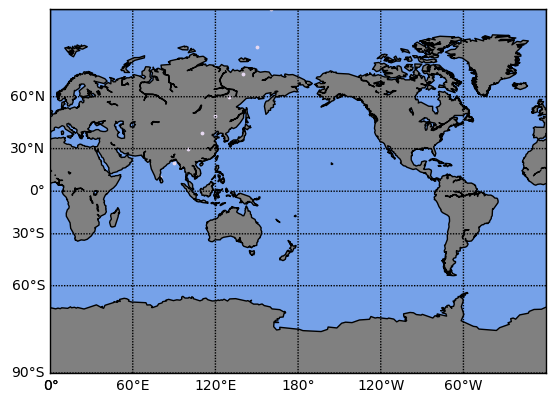

In [29]:
# miller projection 
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.fillcontinents(color='gray',lake_color=BLUE)

lats = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
lons = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
lons = [l+70 for l in lons]
x, y = map(lons,lats)
map.drawmapboundary(fill_color=BLUE)
map.scatter(x,y,3,marker='o',color=LIGHT_MAGENTA)
# plt.title('Locations of %s ARGO floats active between %s and %s' %\
#         (len(lats),date1,date2),fontsize=12)

plt.show()